---
<h1 style="text-align: center;">Data Understanding:</h1>
<h2 style="text-align: center;">Bank Marketing</h2>

*Discentes:*

    *   Arthur Bezerra Calado
    *   Gabriel D'assumpção de Carvalho
    *   Pedro Henrique Sarmento de Paula

*Data:* 16/07/2024

---
---

# Introdução

Nesta fase do projeto, realizaremos uma análise exploratória detalhada dos dados do dataset "Bank Marketing". O objetivo desta análise é entender melhor a estrutura dos dados, identificar padrões, verificar a distribuição das variáveis e descobrir possíveis correlações que possam influenciar os resultados.

As variáveis que serão exploradas incluem:

| Nome da variável | Papel          | Tipo       | Demográfico           | Descrição                                                                                                                                                                                                                                                                                                                                                                                                                                         | Unidades | Valores ausentes |
|------------------|----------------|------------|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|----------|------------------|
| idade            | Característica | Inteiro    | Idade                 |                                                                                                                                                                                                                                                                                                                                                                                                                                                   |          | Não              |
| trabalho         | Característica | Categórico | Ocupação              | Tipo de emprego (categórico: 'Admin.', 'Blue-collar', 'Entrepreneur', 'Householdant', 'Management', 'Aposentado', 'Autônomo', 'Serviços', 'Estudante', 'Técnico', 'Desempregado', 'Desconhecido')                                                                                                                                                                                                                                                 |          | Não              |
| conjugal         | Característica | Categórico | Estado civil          | estado civil (categórico: 'divorciado', 'casado', 'solteiro', 'desconhecido'; nota: 'divorciado' significa divorciado ou viúvo)                                                                                                                                                                                                                                                                                                                   |          | Não              |
| educação         | Característica | Categórico | Nível de escolaridade | (categórico: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown')                                                                                                                                                                                                                                                                                                              |          | Não              |
| inadimplência    | Característica | Binário    |                       | tem crédito inadimplente?                                                                                                                                                                                                                                                                                                                                                                                                                         |          | Não              |
| equilíbrio       | Característica | Inteiro    |                       | saldo médio anual                                                                                                                                                                                                                                                                                                                                                                                                                                 | Euros    | Não              |
| habitação        | Característica | Binário    |                       | Tem crédito habitação?                                                                                                                                                                                                                                                                                                                                                                                                                            |          | Não              |
| empréstimo       | Característica | Binário    |                       | Tem empréstimo pessoal?                                                                                                                                                                                                                                                                                                                                                                                                                           |          | Não              |
| contato          | Característica | Categórico |                       | tipo de comunicação de contato (categórico: 'celular', 'telefone')                                                                                                                                                                                                                                                                                                                                                                                |          | Sim              |
| day_of_week      | Característica | Data       |                       | último dia de contato da semana                                                                                                                                                                                                                                                                                                                                                                                                                   |          | Não              |
| mês              | Característica | Data       |                       | último mês do ano de contato (categórico: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                                                                                                                                                                                                                                                                                                 |          | Não              |
| duração          | Característica | Inteiro    |                       | Duração do último contato, em segundos (numérico). Observação importante: esse atributo afeta fortemente o destino de saída (por exemplo, se duration=0 e y='no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o fim da chamada y é obviamente conhecido. Assim, esse insumo só deve ser incluído para fins de benchmark e deve ser descartado se a intenção for ter um modelo preditivo realista. |          | Não              |
| campanha         | Característica | Inteiro    |                       | número de contatos realizados durante esta campanha e para este cliente (numérico, inclui último contato)                                                                                                                                                                                                                                                                                                                                         |          | Não              |
| pdays            | Característica | Inteiro    |                       | número de dias que se passaram após o cliente ter sido contatado pela última vez a partir de uma campanha anterior (numérico; -1 significa que o cliente não foi contatado anteriormente)                                                                                                                                                                                                                                                         |          | Sim              |
| anterior         | Característica | Inteiro    |                       | número de contatos realizados antes desta campanha e para este cliente                                                                                                                                                                                                                                                                                                                                                                            |          | Não              |
| presultado       | Característica | Categórico |                       | resultado da campanha de marketing anterior (categórico: 'fracasso', 'inexistente', 'sucesso')                                                                                                                                                                                                                                                                                                                                                    |          | Sim              |
| y                | Alvo           | Binário    |                       | O cliente subscreveu um depósito a prazo?                                                                                                                                                                                                                                                                                                                                                                                                         |          |                  |


A análise exploratória incluirá a avaliação de dados faltantes, a identificação de outliers e a verificação de possíveis dados duplicados. Esta etapa é crucial para garantir a qualidade dos dados e a integridade das análises subsequentes.

# Biblioteca utilizadas

1) pandas -> manipulação de dados;

2) numpy -> cálculos estatísticos;

4) matplotlib -> gráficos;

5) seaborn -> gráficos;

6) scipy -> transformação de variável;

7) warnings -> remoção de avisos

In [1]:
# Instalação das bibliotecas

# %pip install pandas

# %pip install ucimlrepo

# %pip install numpy

# %pip install scipy

# %pip install matplotlib

# %pip install seaborn

In [2]:
# Importação das bibliotecas

import pandas as pd

import numpy as np

from scipy.stats import boxcox

import matplotlib.pyplot as plt

import seaborn as sns

import warnings

from ucimlrepo import fetch_ucirepo 



In [3]:
# Desativa todos os avisos
warnings.filterwarnings("ignore")


In [4]:
# Baixando os dados
bank_marketing = fetch_ucirepo(id=222)

In [31]:
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets

In [6]:
# Criando variável que vai ter as variáveis transformada
Xt = X

# Análise Exploratória

In [7]:
# Verificando as 5 primeiras linhas de x e y
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [27]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


## Dados Faltantes

In [9]:
# Verificando dados faltantes
len_x = {}
total_rows = len(X)
for n in X.columns:
    len_x[n] = [len(X[n].dropna())]
    len_x[n].append(total_rows - len_x[n][0])
len_x = pd.DataFrame.from_dict(len_x, orient='index', columns=['Nº Observações', 'Observações Faltantes'])
len_x

,Nº Observações,Observações Faltantes
age,45211,0
job,44923,288
marital,45211,0
education,43354,1857
default,45211,0
balance,45211,0
housing,45211,0
loan,45211,0
contact,32191,13020
day_of_week,45211,0


Podemos observar na tabela acima o número de observações para cada característica e a quantidade de dados faltantes. O banco de dados possui um total de 45.211 observações. As variáveis job (trabalho), education (educação), contact (contato) e poutcome (resultado da campanha anterior) apresentam 288, 1.857, 13.020 e 36.959 dados faltantes, respectivamente.

## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

In [10]:
pd.options.display.float_format = "{:.4f}".format

### Idade

In [11]:
X["age"].describe()

count   45211.0000
mean       40.9362
std        10.6188
min        18.0000
25%        33.0000
50%        39.0000
75%        48.0000
max        95.0000
Name: age, dtype: float64

In [12]:
X["age"].mode()

0    32
Name: age, dtype: int64

Ao analisarmos em detalhes os dados relativos à idade dos clientes, percebemos que a média das idades é próxima de 41, variando entre o mínimo de 18 e um máximo de 95. Além disso, podemos observar um desvio padrão de aproximadamente 11, o que indica uma dispersão significativa dos valores. Portanto, em média, os clientes têm idades compreendidas entre 30 e 51 anos.

É importante notar que a média de 41 anos supera tanto a mediana de 39 quanto a moda de 32, sugerindo uma assimetria positiva nos dados devido à presença de idades mais altas no terceiro quartil, que é de 48 anos, próximo do valor máximo.

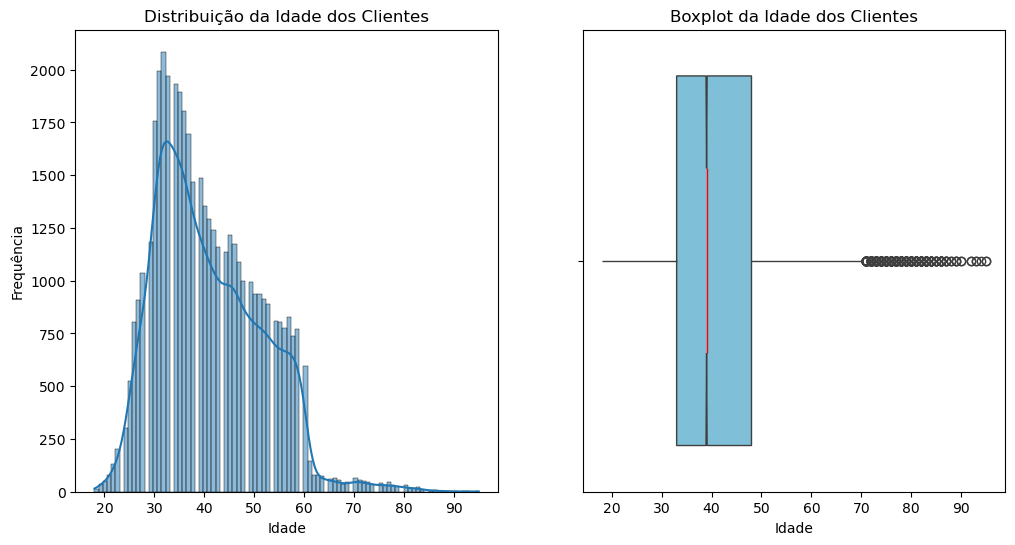

In [13]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(X["age"], kde=True)
plt.title("Distribuição da Idade dos Clientes")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.subplot(1, 2, 2)
sns.boxplot(X["age"], orient='h', notch=True, showcaps=False,
            boxprops={"facecolor": (0, .5, .7, .5)},
            medianprops={"color": "r", "linewidth": 1})
plt.title("Boxplot da Idade dos Clientes")
plt.xlabel("Idade")
plt.show()

Como mencionado anteriormente, é possível observar a assimetria positiva nas idades devido à presença de uma pequena parte dos clientes que são pessoas idosas. Após analisar todas as variáveis, vamos propor algumas transformações para tentar melhorar a qualidade dos dados, reduzindo assimetrias e outliers.

### Trabalho

A variável que indica o trabalho exercido por cada cliente é do tipo categórica, podendo ser:

    Admin.: Administrativo
    Blue-collar: Trabalhador manual
    Entrepreneur: Empresário
    Householdant: Trabalhador doméstico
    Management: Gerência
    Retired: Aposentado
    Self-employed: Autônomo
    Services: Serviços gerais
    student: Estudante
    Technician: Técnico
    Unemployed: Desempregado
    Unknown: Desconhecido

Para verificar essa variável, vamos estar analisando a quantidade da frequência de cada classe.

In [41]:
job_counts = X['job'].value_counts().sort_index()
print(job_counts*100/44923)

job
admin.          11.5108
blue-collar     21.6637
entrepreneur     3.3101
housemaid        2.7603
management      21.0538
retired          5.0397
self-employed    3.5149
services         9.2469
student          2.0880
technician      16.9112
unemployed       2.9005
Name: count, dtype: float64


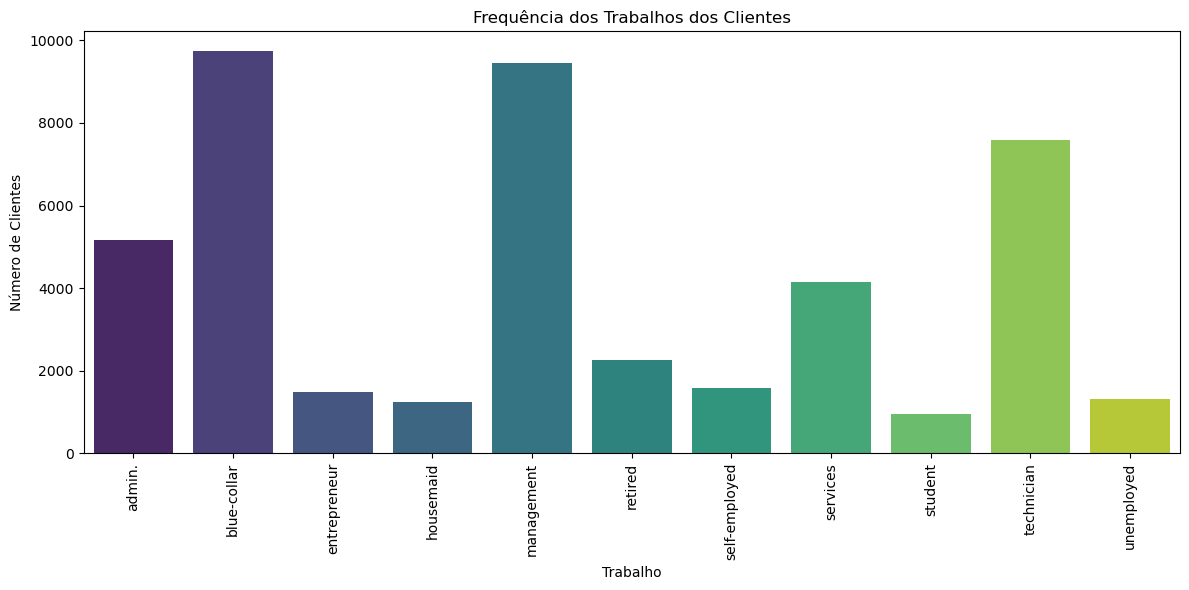

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(x=job_counts.index, y=job_counts.values, palette='viridis')
plt.title('Frequência dos Trabalhos dos Clientes')
plt.xlabel('Trabalho')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

Podemos observar tanto na lista acima quanto no gráfico que a base de dados possui mais clientes que desempenham papéis de administradores, trabalhadores manuais, gerência e técnicos, representando 11,51%, 21,6%, 21,05% e 16,91% das 44.923 observações da variável trabalho. É importante lembrar que esta variável possui 1.303 observações classificadas como trabalho desconhecido, além de 288 observações faltantes.

Devido aos problemas como desequilíbrio entre as classes e dados faltantes, na sessão de transformações serão abordados alguns mecanismos para o tratamento dessa variável.

Além disso, podemos verificar quais tipos de trabalhadores são mais propensos a aceitar o produto oferecido pelo banco por meio do telemarketing.

In [76]:
job_yes_counts = X[y.values == 'yes']['job'].value_counts().sort_index()
job_yes_percentages = job_yes_counts * 100 / job_yes_counts.sum()
print(job_yes_percentages)

job
admin.          12.0076
blue-collar     13.4729
entrepreneur     2.3406
housemaid        2.0742
management      24.7574
retired          9.8192
self-employed    3.5585
services         7.0219
student          5.1189
technician      15.9848
unemployed       3.8440
Name: count, dtype: float64


In [61]:
sum(job_yes_counts.values)

5255

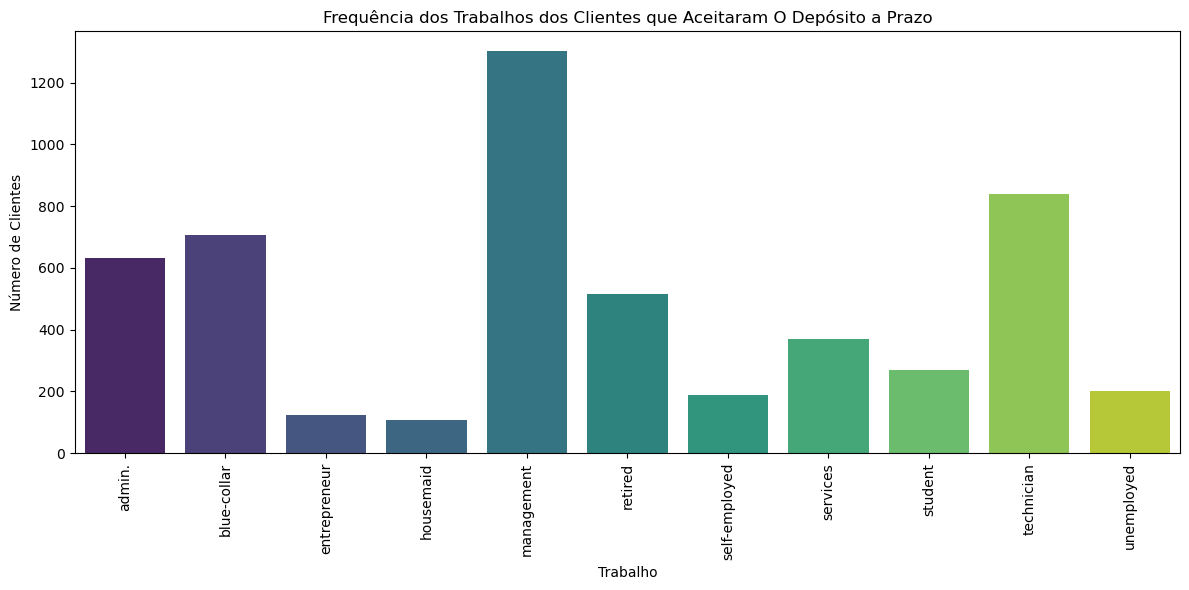

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(x=job_yes_counts.index, y=job_yes_counts.values, palette='viridis')
plt.title('Frequência dos Trabalhos dos Clientes que Aceitaram O Depósito a Prazo')
plt.xlabel('Trabalho')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90) 
plt.tight_layout()

Observando os trabalhadores que aceitaram o depósito a prazo, as coisas mudam um pouco. A maioria dos clientes que aceitam tem papéis como gerentes, técnicos, trabalhadores manuais, administradores e aposentados, representando aproximadamente 24,76%, 15,98%, 13,47% e 12,01% das 5.255 observações, respectivamente.

Essa análise é de extrema importância porque, anteriormente, vimos que o banco tem feito telemarketing para muitas pessoas que realizam trabalhos manuais, enquanto gerentes e técnicos representam cerca de 40,73% dos clientes que aceitam o produto.

### Estado Civil

A variável *marital* que representa o estado civil do cliente pode apresentar 4 categorias, sendo elas:

    Married: Casado
    Single: Solteiro
    Divorced: Divorciado ou Viúvo
    Unknown: Desconhecido
    

In [85]:
marital_counts*100/44923

marital
divorced   11.5909
married    60.5792
single     28.4709
Name: count, dtype: float64

In [96]:
marital_counts = X['marital'].value_counts().sort_index()

marital_percentages = (marital_counts * 100 / sum(marital_counts.values))
print(marital_percentages)

marital
divorced   11.5171
married    60.1933
single     28.2896
Name: count, dtype: float64


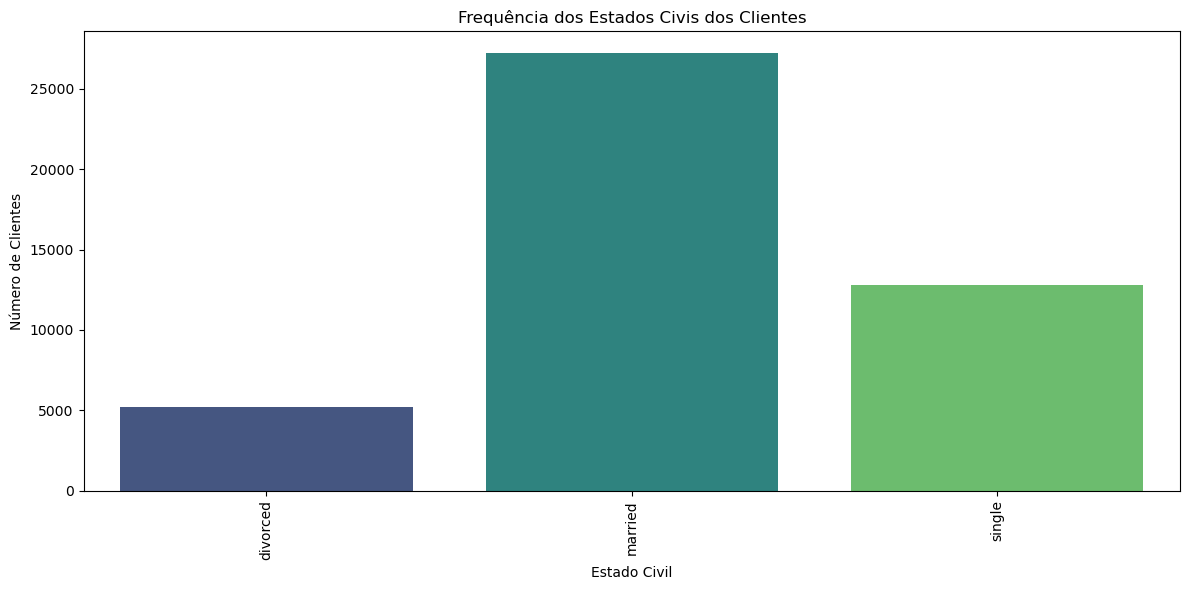

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x=marital_counts.index, y=marital_counts.values, palette='viridis')
plt.title('Frequência dos Estados Civis dos Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=90) 
plt.tight_layout()